In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #plot configuration

#Reading the data
df = pd.read_csv('movies.csv', encoding='latin-1')

In [2]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [3]:
#step-1) Checking for missing Data

for col in df.columns:
    pct_missing=np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

budget - 0.0%
company - 0.0%
country - 0.0%
director - 0.0%
genre - 0.0%
gross - 0.0%
name - 0.0%
rating - 0.0%
released - 0.0%
runtime - 0.0%
score - 0.0%
star - 0.0%
votes - 0.0%
writer - 0.0%
year - 0.0%


In [4]:
#step-2: Check Datatype of each column
df.dtypes

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

In [5]:
df['budget']=df['budget'].astype('int')
df['gross']=df['gross'].astype('int')

In [6]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [7]:
#year in realase date and year column do not match so we will process this
df['CorrectYear']=df['released'].astype(str).str[:4]


In [8]:
#sort by highest grossing
df.sort_values(by=['gross'],inplace=True,ascending=False)

In [9]:
df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,CorrectYear
6380,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015,2015
5061,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,954412,James Cameron,2009,2009
2420,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997,1997
6391,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,469200,Rick Jaffa,2015,2015
5723,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5917,0,Zentropa International Norway,Norway,Petter Næss,Action,547,Into the White,R,2013-04-12,104,7.2,Florian Lukas,16609,Ole Meldgaard,2012,2013
5699,0,Isle of Man Film,UK,Sheree Folkson,Comedy,542,The Decoy Bride,PG,2012-03-09,89,6.2,Kelly Macdonald,9018,Neil Jaworski,2011,2012
6066,0,Cinetel Films,USA,Steven R. Monroe,Crime,441,I Spit on Your Grave 2,R,2014-01-19,106,5.7,Jemma Dallender,21070,Neil Elman,2013,2014
2594,15000000,Daybreak,USA,George Huang,Comedy,309,Trojan War,PG-13,1997-10-01,84,5.7,Will Friedle,5034,Andy Burg,1997,1997


In [10]:
#look at all the rows
#pd.set_option('display.max_rows',None)

In [11]:
#remove any duplicate values
print('Shape of Data before droping duplicated:',df.shape)
df=df.drop_duplicates()
print('Shape of Data before droping duplicated:',df.shape)


Shape of Data before droping duplicated: (6820, 16)
Shape of Data before droping duplicated: (6820, 16)


In [12]:
#Analysis
#Check the Co relation between gross revenue and different cols


Text(0.5, 0, 'Budget for Film')

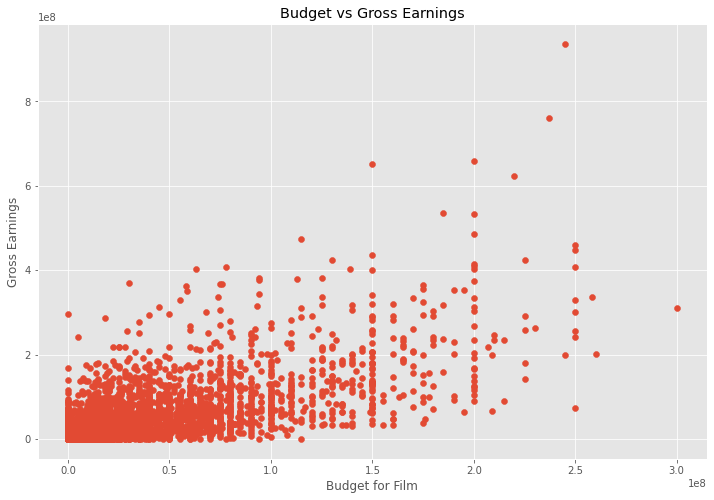

In [13]:
#1) Scatter plot budget vs gross

plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.ylabel('Gross Earnings')
plt.xlabel('Budget for Film')

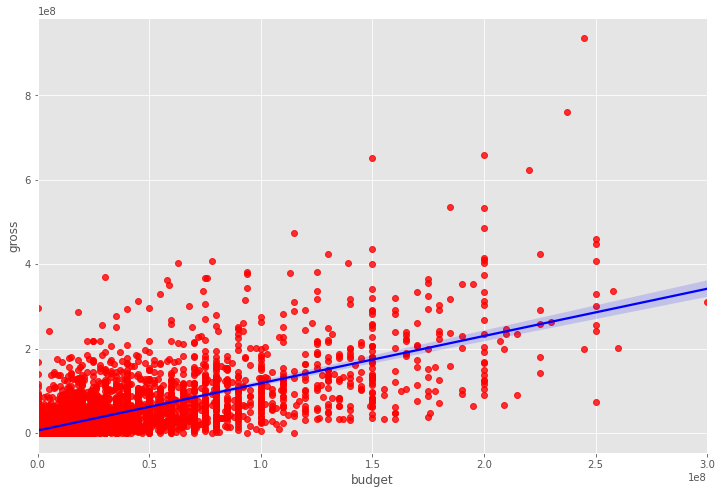

In [14]:
#regressionplot

sns.regplot(x='budget',y='gross', data=df, scatter_kws={"color":"red"},line_kws={"color":"Blue"})

In [15]:
#Correaltion (pearson, kendall, spearman)
corr_matrix=df.corr() #only works on numerical columns (Pearson Correlation)


In [16]:
df.corr(method="kendall")

,budget,gross,runtime,score,votes,year
budget,1.000000,0.523459,0.164816,-0.019526,0.451137,0.214114
gross,0.523459,1.000000,0.139270,0.033163,0.479772,0.098585
runtime,0.164816,0.139270,1.000000,0.282068,0.195640,0.073785
score,-0.019526,0.033163,0.282068,1.000000,0.272967,0.070451
votes,0.451137,0.479772,0.195640,0.272967,1.000000,0.339625
year,0.214114,0.098585,0.073785,0.070451,0.339625,1.000000


In [17]:
df.corr(method='spearman')

,budget,gross,runtime,score,votes,year
budget,1.000000,0.698639,0.231672,-0.027868,0.616419,0.300553
gross,0.698639,1.000000,0.202905,0.045582,0.667869,0.139467
runtime,0.231672,0.202905,1.000000,0.398840,0.287150,0.107902
score,-0.027868,0.045582,0.398840,1.000000,0.392199,0.103598
votes,0.616419,0.667869,0.287150,0.392199,1.000000,0.485588
year,0.300553,0.139467,0.107902,0.103598,0.485588,1.000000


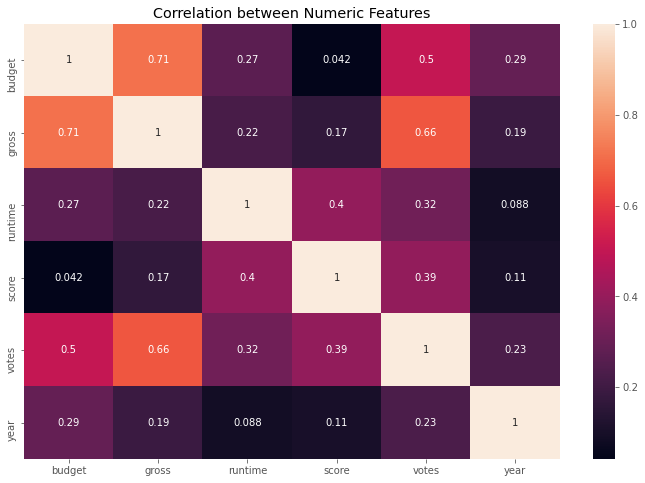

In [18]:
#heatmap of correlation
sns.heatmap(corr_matrix,annot=True)
plt.title('Correlation between Numeric Features')
plt.show()

In [24]:
#looking at production company-since company col is not numeric so we will encode it
df_numerized = df
cat_cols = ['company','country','director','genre','star','writer','rating']

for col in cat_cols:
    
    if (df_numerized[col].dtype =='object'):
        df_numerized[col]=df_numerized[col].astype('category')
        df_numerized[col]=df_numerized[col].cat.codes
        
df_numerized

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,CorrectYear
6380,245000000,1428,54,1037,0,936662225,Star Wars: The Force Awakens,7,2015-12-18,136,8.1,475,687192,2356,2015,2015
5061,237000000,2062,53,1066,0,760507625,Avatar,7,2009-12-18,162,7.8,2084,954412,1629,2009,2009
2420,200000000,2062,54,1066,6,658672302,Titanic,7,1997-12-19,194,7.8,1444,862554,1629,1997,1997
6391,150000000,2085,54,466,0,652270625,Jurassic World,7,2015-06-12,124,7.0,404,469200,3310,2015,2015
5723,220000000,1491,54,1412,0,623357910,The Avengers,7,2012-05-04,143,8.1,2001,1064633,2145,2012,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5917,0,2171,35,2071,0,547,Into the White,8,2013-04-12,104,7.2,748,16609,2981,2012,2013
5699,0,1262,53,2385,4,542,The Decoy Bride,6,2012-03-09,89,6.2,1335,9018,2903,2011,2012
6066,0,631,54,2484,5,441,I Spit on Your Grave 2,8,2014-01-19,106,5.7,1047,21070,2901,2013,2014
2594,15000000,764,54,883,4,309,Trojan War,7,1997-10-01,84,5.7,2459,5034,217,1997,1997


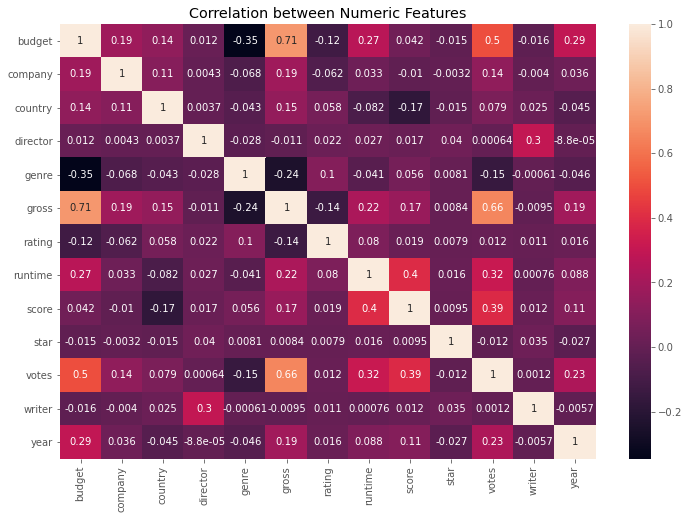

In [25]:
#heatmap of correlation

corr_matrix_all=df_numerized.corr() 

sns.heatmap(corr_matrix_all,annot=True)
plt.title('Correlation between Numeric Features')
plt.show()

In [23]:
#unstacked pairs of correlated features
corr_mat = df_numerized.corr()

corr_pairs =corr_mat.unstack()
corr_pairs

budget  budget      1.000000
        company     0.187205
        country     0.137635
        director    0.011602
        genre      -0.346794
                      ...   
year    score       0.105276
        star       -0.026680
        votes       0.229304
        writer     -0.005665
        year        1.000000
Length: 169, dtype: float64

In [27]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget    genre      -0.346794
genre     budget     -0.346794
gross     genre      -0.242676
genre     gross      -0.242676
score     country    -0.174414
                        ...   
director  director    1.000000
country   country     1.000000
company   company     1.000000
writer    writer      1.000000
year      year        1.000000
Length: 169, dtype: float64

In [32]:
high_corr = sorted_pairs[((sorted_pairs)>0.5) & ((sorted_pairs)<1)]
high_corr

votes   budget    0.503924
budget  votes     0.503924
votes   gross     0.662457
gross   votes     0.662457
        budget    0.712196
budget  gross     0.712196
dtype: float64

In [ ]:
#votes and budget have the highest correlation with the gross